<a href="https://colab.research.google.com/github/Fjolnirr/FakeNewsClassifier/blob/main/FakeNewsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Classifier

Dataset: https://www.kaggle.com/c/fake-news/data#

In [ ]:
#Go to the dataset directory
cd "../content/"

/content


In [3]:
#import necessary libraries
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/Fjolnirr/FakeNewsClassifier/main/Resources/train.csv'
#Read csv file from github
df = pd.read_csv(url, engine='python', error_bad_lines=False)

In [ ]:
# Or Read the data from file
df = pd.read_csv('../content/train.csv', engine="python",error_bad_lines=False)

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
#Get the independent features
X = df.drop('label', axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [7]:
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: object

In [8]:
df.shape

(20822, 5)

## Preprocessing

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [10]:
#Drop the rows where at least one element is missing.
df = df.dropna() 
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [11]:
messages = df.copy()
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
messages['text'][:10]

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    Ever get the feeling your life circles the rou...
2    Why the Truth Might Get You Fired October 29, ...
3    Videos 15 Civilians Killed In Single US Airstr...
4    Print \nAn Iranian woman has been sentenced to...
5    In these trying times, Jackie Mason is the Voi...
6    PARIS  —   France chose an idealistic, traditi...
7    A week before Michael T. Flynn resigned as nat...
8    Organizing for Action, the activist group that...
9    The BBC produced spoof on the “Real Housewives...
Name: text, dtype: object

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Stopwords and Stemming

In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus=[]
for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z]', " ", messages['text'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)


KeyboardInterrupt: ignored

In [ ]:
corpus[:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

### Bag of Words

In [ ]:
# Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = vectorizer.fit_transform(corpus).toarray()

## TF-IDF

In [ ]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=vectorizer.fit_transform(corpus).toarray()

In [ ]:
X.shape

(10023, 5000)

In [ ]:
y=messages['label']

### Split Data (Train and Test)

In [ ]:
#Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
vectorizer.get_feature_names()[:20]

['ab',
 'abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'absolut',
 'absurd',
 'abus',
 'accept',
 'access',
 'access pipelin',
 'accident',
 'accord',
 'account',
 'accus',
 'achiev']

In [ ]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X_train, columns=vectorizer.get_feature_names())

In [ ]:
count_df.head()

,ab,abandon,abc,abc news,abduct,abe,abedin,abl,abort,absolut,absurd,abus,accept,access,access pipelin,accident,accord,account,accus,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,across,act,act new,act new york,action,activ,activist,actor,actual,ad,ad new,ad new york,adam,add,addict,...,xi jinp,yahoo,yale,ye,year,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yemeni,yesterday,yet,yet anoth,yiannopoulo,yield,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,yr,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

accuracy : 0.904
Confusion matrix, without normalization


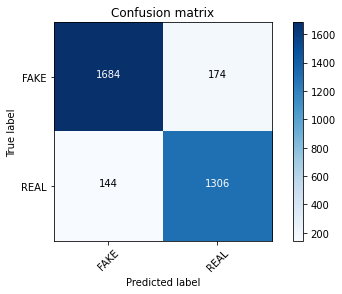

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy : %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
y_train.shape

(6715,)

## Passive Aggressive Classifier Algorithm

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy : 0.915
Confusion matrix, without normalization


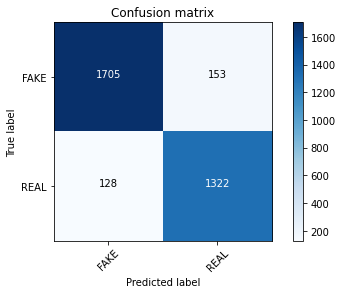

In [ ]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy : %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## Multinomial Classifier with Hyperparameter

In [ ]:
classifier = MultinomialNB()

In [ ]:
preScore = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > preScore:
      classifier = sub_classifier
    preScore = score
    print('alpha : {:.3f}, Score : {}'.format(alpha, score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


alpha : 0.000, Score : 0.8748488512696493
alpha : 0.100, Score : 0.9008464328899637
alpha : 0.200, Score : 0.902962515114873
alpha : 0.300, Score : 0.904776299879081
alpha : 0.400, Score : 0.9044740024183797
alpha : 0.500, Score : 0.902962515114873
alpha : 0.600, Score : 0.9023579201934704
alpha : 0.700, Score : 0.903869407496977
alpha : 0.800, Score : 0.9035671100362757
alpha : 0.900, Score : 0.9035671100362757


In [ ]:
#Get Feature Names
feature_names = vectorizer.get_feature_names()

In [ ]:
classifier.coef_[0]

array([ -9.16037174,  -8.606061  ,  -9.16037174, ..., -10.51029845,
       -10.51029845, -10.51029845])

In [ ]:
# Most Real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[0:20]

[(-4.074377048422423, 'trump'),
 (-4.337405604927949, 'hillari'),
 (-4.4408812928862655, 'clinton'),
 (-4.9679150867485555, 'elect'),
 (-5.199911362217303, 'new'),
 (-5.28839941759154, 'video'),
 (-5.335764229515496, 'comment'),
 (-5.394016969621428, 'fbi'),
 (-5.402622874714307, 'war'),
 (-5.446799669199347, 'us'),
 (-5.455874141632753, 'email'),
 (-5.493018616037746, 'hillari clinton'),
 (-5.561538562474502, 'obama'),
 (-5.6351011296515185, 'world'),
 (-5.691169625127442, 'vote'),
 (-5.867282124374465, 'donald'),
 (-5.90942319114746, 'presid'),
 (-5.90942319114746, 'donald trump'),
 (-5.90942319114746, 'break'),
 (-5.923874309685634, 'russia')]

In [ ]:
# Most Fake
sorted(zip(classifier.coef_[0], feature_names))[0:20]

[(-10.51029845285267, 'abe'),
 (-10.51029845285267, 'achiev'),
 (-10.51029845285267, 'act new'),
 (-10.51029845285267, 'act new york'),
 (-10.51029845285267, 'ad new'),
 (-10.51029845285267, 'ad new york'),
 (-10.51029845285267, 'add'),
 (-10.51029845285267, 'address breitbart'),
 (-10.51029845285267, 'administr breitbart'),
 (-10.51029845285267, 'adopt'),
 (-10.51029845285267, 'advic'),
 (-10.51029845285267, 'advis new'),
 (-10.51029845285267, 'advis new york'),
 (-10.51029845285267, 'aftermath'),
 (-10.51029845285267, 'agricultur'),
 (-10.51029845285267, 'ahmad'),
 (-10.51029845285267, 'ail'),
 (-10.51029845285267, 'airbag'),
 (-10.51029845285267, 'airlin'),
 (-10.51029845285267, 'aleppo new')]